## Example for Prediction (Part 3)

#### **TO DO**:
- Split dataset in train/test
- Prediction after feature importance

[Interactive Widgets](https://ipython-books.github.io/33-mastering-widgets-in-the-jupyter-notebook/): [Widget List](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html) ; [Using Interact](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html)

[graphviz](https://graphviz.readthedocs.io/en/stable/manual.html)


Filename:  C:/Users/JTavares/Documents/GitHub/Tese/3/Dados de defeito enviados - processed.csv

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Import CSV

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from sklearn import metrics
from IPython.display import display, clear_output, Markdown

from google.colab import files
import io

In [4]:
!ls "/content/gdrive/MyDrive/IST/0 JT/Ano5Sem2/Tese/Dados/test - processed 1.csv"

'/content/gdrive/MyDrive/IST/0 JT/Ano5Sem2/Tese/Dados/test - processed 1.csv'


In [5]:
path = "/content/gdrive/MyDrive/IST/0 JT/Ano5Sem2/Tese/Dados/test - processed 1.csv"

print("Filename: ", path)

df = pd.read_csv(path)

display(df.head())
print("Shape:", df.shape)

Filename:  /content/gdrive/MyDrive/IST/0 JT/Ano5Sem2/Tese/Dados/test - processed 1.csv


,index,Ordem,n_operations,Tipo de operação,Tipo de operação n2,Qtd.ordem,out_Qtd.ordem,dif,out_defects,CT,...,car1,car2,esm,dim1_1,dim1_2,car1_1,f_prep,li_bd,var,outliers
0,6,1000234824,1,APLICAÇÃO DE VERNIZ,1ª APLICAÇÃO DE VERNIZ OURO INTERIOR,5305,5305,63,63,LE04,...,"E2,0",TS275,ESMALTE 135.262,286.0,NaN,LI-LD,0.0,0.0,1.187559,False
1,7,1000234824,2,APLICAÇÃO DE VERNIZ,2ª APLICAÇÃO DE VERNIZ OURO INTERIOR,5242,5242,11,11,LE04,...,"E2,0",TS275,ESMALTE 135.262,286.0,NaN,LI-LD,0.0,0.0,0.209844,False
2,8,1000234824,3,APLICAÇÃO DE ESMALTE BRANCO,APLICAÇÃO DE ESMALTE BRANCO,5231,5231,71,71,LE06,...,"E2,0",TS275,ESMALTE 135.262,286.0,NaN,LI-LD,0.0,0.0,1.357293,False
3,9,1000234824,4,APLICAÇÃO DE VERNIZ,APLICAÇÃO DE VERNIZ DE ACABAMENTO,5160,5160,181,181,LI05,...,"E2,0",TS275,ESMALTE 135.262,286.0,NaN,LI-LD,0.0,0.0,3.507752,False
4,10,1000234824,5,CORTE DE FOLHA,CORTE DE FOLHA,4979,4979,22,22,CS11,...,"E2,0",TS275,ESMALTE 135.262,286.0,NaN,LI-LD,0.0,0.0,0.441856,False


Shape: (27032, 43)


---

### Select data to be observed
- Select features to be evaluated
- Select level of visualisation

In [6]:
import ipywidgets as widgets
from IPython.display import display, clear_output, Markdown

data = df.keys()
dtypes = df.dtypes
features = [out for out in data if "out_" not in out]
output = [out for out in data if "out_" in out]
checkboxes = [widgets.Checkbox(value=True, description=label) for label in features]
out_checkboxes = [widgets.Checkbox(value=True, description=label) for label in output]
out_options = [widgets.Dropdown(options=['sum', 'mean', 'max', 'min'], description='Aggregate options:') for x in output]
out_qt = widgets.ToggleButtons(options=output, description='Detected defects:', style = {'description_width': 'initial'})
butt = widgets.Button(description="OK", icon="check")


lst = [[], [], []] ; out_lst = [[], []]
for i in range(len(checkboxes)):
    lst[i%3].append(checkboxes[i])

# for i in range(len(out_checkboxes)):
#     out_lst[0].append(out_checkboxes[i])
#     out_lst[1].append(out_options[i])


tab1 = widgets.HBox([widgets.VBox(lst[0]), widgets.VBox(lst[1]), widgets.VBox(lst[2])])
tab2 = widgets.HBox([out_qt]) # widgets.VBox(out_lst[0]), widgets.VBox(out_lst[1]), out_qt])

outt = widgets.Output()
selected_features = []
selected_output = []

def on_check_clicked(b):
    with outt:
        clear_output()
        global selected_data
        global selected_output
        selected_data = []
        selected_output = []
        for i in range(0, len(checkboxes)):
            if checkboxes[i].value == True:
                selected_data = selected_data + [checkboxes[i].description]
#         for i in range(0, len(out_checkboxes)):
#             if out_checkboxes[i].value == True:
#                 selected_output[out_checkboxes[i].description] = out_options[i].value
        if output[0] != out_qt.value:
            selected_output = [out_qt.value, output[0]]
        else:
            selected_output = output

        print("Selected data: ", selected_data)
        print("Selected output: ", selected_output)




tab = widgets.Tab(children=[tab1, tab2])
tab.set_title(0, 'Features')
tab.set_title(1, 'Output')
widgets.VBox(children=[tab])

butt.on_click(on_check_clicked)
display(tab, butt, outt)

Button(description='OK', icon='check', style=ButtonStyle())

Output()

### Create measure ratios

In [7]:
df["percentage"] = df[selected_output[0]]/df[selected_output[1]]*100

# create ratio from percentage
total_percentage = df["percentage"].sum()

df["ratio"] = df["percentage"]/total_percentage * 100

total_ratio = df["ratio"].max()
print("Max value:", total_ratio)
df1 = df[df['percentage'] >= 30]


Max value: 0.16858682088111965


In [8]:
df1.head()

,index,Ordem,n_operations,Tipo de operação,Tipo de operação n2,Qtd.ordem,out_Qtd.ordem,dif,out_defects,CT,...,esm,dim1_1,dim1_2,car1_1,f_prep,li_bd,var,outliers,percentage,ratio
14,24,1000241762,2,EMBALAMENTO,EMBALAMENTO,2338,2338,1548,1548,EM01,...,NaN,284.0,445.0,BD-CY,0.0,1.0,66.210436,False,66.210436,0.161232
74,100,1000243603,5,APLICAÇÃO DE TINTA DE IMPRESSÃO,APLICAÇÃO DE TINTA DE IMPRESSÃO,1851,1851,1161,1161,LI05,...,ESM BRANCO HB-367 A,65.0,300.0,BD-AE,0.0,1.0,62.722853,False,62.722853,0.152739
214,333,1000244452,3,APLICAÇÃO DE TINTA DE IMPRESSÃO,APLICAÇÃO DE TINTA DE IMPRESSÃO,1014,1014,614,614,LI13,...,ESM BRANCO HB-367 A,52.0,195.0,BD-AE,0.0,1.0,60.552268,False,60.552268,0.147453
494,734,1000244768,3,APLICAÇÃO DE TINTA DE IMPRESSÃO,APLICAÇÃO DE TINTA DE IMPRESSÃO,398,398,198,198,LI17,...,NaN,62.0,65.0,BD-CY,0.0,1.0,49.748744,False,49.748744,0.121145
514,759,1000244779,1,APLICAÇÃO DE VERNIZ,APLICAÇÃO DE VERNIZ PRIMÁRIO,1785,1785,737,737,LE02,...,ESM BRANCO 320.133,50.0,NaN,LI-BT,0.0,0.0,41.288515,False,41.288515,0.100543


In [9]:
# df = df2 # para dataset completo
df2 = df.copy()

In [10]:
ranges = [-0.001, 0, 0.001, 0.01, 0.1, 1, 5, 10, 30, 50,100]
ranges1 = [0, 2, 5, 10, 30, 50,100,200, 300, 600]
ranges2 = [-500, -0.01, 0, 3, 10, 60, 100, 300, 600, 1200, 3000, 6000, 15000, 100000]
display(df['percentage'].groupby(pd.cut(df['percentage'], ranges)).count())

# df = df2 # para dataset completo
# df2 = df.copy()
df3 = df2[df2['percentage'] <= 10]
df4 = df3[df3['Difference'] <= 10]
print("\n")
display(df3['percentage'].groupby(pd.cut(df3['percentage'], ranges)).count())
print("\n")
display(df4['Difference'].groupby(pd.cut(df4['Difference'], ranges1)).count())
# df5 = df4[df4['Quantidade operação (MEINH)'] <= 10000]
print("\n")
display(df4['Qtd.ordem'].groupby(pd.cut(df4['Qtd.ordem'], ranges2)).count())

percentage
(-0.001, 0.0]    14814
(0.0, 0.001]         0
(0.001, 0.01]        0
(0.01, 0.1]        140
(0.1, 1.0]        4663
(1.0, 5.0]        5399
(5.0, 10.0]       1166
(10.0, 30.0]       701
(30.0, 50.0]       120
(50.0, 100.0]       29
Name: percentage, dtype: int64

percentage
(-0.001, 0.0]    14814
(0.0, 0.001]         0
(0.001, 0.01]        0
(0.01, 0.1]        140
(0.1, 1.0]        4663
(1.0, 5.0]        5399
(5.0, 10.0]       1166
(10.0, 30.0]         0
(30.0, 50.0]         0
(50.0, 100.0]        0
Name: percentage, dtype: int64

Difference
(0, 2]        5446
(2, 5]        6385
(5, 10]       5742
(10, 30]         0
(30, 50]         0
(50, 100]        0
(100, 200]       0
(200, 300]       0
(300, 600]       0
Name: Difference, dtype: int64

Qtd.ordem
(-500.0, -0.01]           0
(-0.01, 0.0]              0
(0.0, 3.0]                0
(3.0, 10.0]               9
(10.0, 60.0]             24
(60.0, 100.0]            94
(100.0, 300.0]         1007
(300.0, 600.0]         2569
(600.0, 1200.0]        5286
(1200.0, 3000.0]       6558
(3000.0, 6000.0]       3660
(6000.0, 15000.0]      2172
(15000.0, 100000.0]     579
Name: Qtd.ordem, dtype: int64

In [11]:
df5 = df4[df4['Qtd.ordem'] >= 400]
df5_1 = df5[df5['Qtd.ordem'] <= 4000]
df5_1.to_csv(r'test - processed - part 4 - qtd red - 2022.csv', index = False)

m = df5_1['n_operations'] == 3

df6 = df5_1[m]#; df6 = df4[~m]

display(df4.groupby(by='n_operations')["out_defects"].count())

n_operations
1    7878
2    7018
3    5197
4    1506
5     263
6      90
7       6
Name: out_defects, dtype: int64

In [12]:
# df = df6
df = df2 # para dataset completo

selected_data = ['Qtd.ordem', "Tipo de operação", 'n_operations', 'Mês', 'dim1',
'dim2', 'dim3', 'car1', 'dim1_1', 'dim1_2', 'car1_1', 'f_prep', 'li_bd', 'Difference']

print(df.isnull().sum())
df.dropna(subset = ["Difference"], inplace=True)
# df.dropna(subset = ["Grupo Mercadorias"], inplace=True)
# df.dropna(subset = ["Caracteristica A", "T (ºC)", "%HR"], inplace=True)

df['dim1_2'].fillna(0, inplace=True)

index                     0
Ordem                     0
n_operations              0
Tipo de operação          0
Tipo de operação n2       0
Qtd.ordem                 0
out_Qtd.ordem             0
dif                       0
out_defects               0
CT                        0
ab                        0
ac                        0
Grupo Mercadorias         0
ad                        0
ae                        0
af                        0
Hierarquia prod           0
Material                  0
Qtd.ordem_old             0
Qtd.confirmada            0
Iníc.real                 0
DtaRealFim                0
Mês                       0
DD                        0
controlo                  0
data_teste                0
start_date              765
end_date                765
Difference              765
week_day                765
dim1                      0
dim2                      0
dim3                      0
car1                      0
car2                      0
esm                 

In [13]:
print(df['car1_1'].value_counts())
df = df[df['car1_1'] == 'BD-AE']
# df = df[df["Tipo de operação"] == "APLICAÇÃO DE TINTA DE IMPRESSÃO"]

BD-AE       12809
BD-CY        3903
LI-LD        2709
BD-TC        1716
LI-BT        1618
BD-RC        1072
LI-TP        1024
BD-TL         959
LI-RG         324
LI-BT/LD      115
LI-LD/BT       15
LI-CI           3
Name: car1_1, dtype: int64


### Prepare targets (for classification)

Prepare Categorical Output by defining n categories for the target.


- [ ] 6 Sigma --> how many categories?
0. 0% (no defects)
1. defects > 69%
2. defects: 69%-31%
3. defects: 31%-6,7%
4. defects: 6,7%-0.62%
5. defects: 0.62%-0.023%
6. defects: 0.023%-0%

- [ ] 2-4 categories

In [14]:
w_bins = widgets.RadioButtons(
    options=['2 levels', '3 levels', '6 Sigma levels'],
    description='Bins:',
    disabled=False
)

w_bins

RadioButtons(description='Bins:', options=('2 levels', '3 levels', '6 Sigma levels'), value='2 levels')

In [15]:
y_mean = df['percentage'].mean()
y_max = df['percentage'].max()
print("Percentage mean: ", y_mean)
print("Percentage max: ", y_max)

bins_6s = [-0.0001, 0, 0.023, 0.62, 6.7, 31, 69, 100]; bins_2 = [-1, 0, y_max] ; bins_3 = [-1, 0, y_mean, y_max]
labels_6s = [0, 1, 2, 3, 4, 5, 6] ; labels_2 = [0, 1] ; labels_3 = [0, 1, 2]

if w_bins.value == "2 levels":
    bins = bins_2 ; labels = labels_2
elif w_bins.value == "3 levels":
    bins = bins_3 ; labels = labels_3
elif w_bins.value == "6 Sigma levels":
    bins = bins_6s ; labels = labels_6s
else:
    print("Choose bins levels")

print("Bins:", w_bins.value)

df['binned'] = pd.cut(df['percentage'], bins=bins, labels=labels)

if df["binned"].isnull().sum() > 0:
    df.dropna(subset = ["binned"], inplace=True)

display(df.head())
print(df.shape)

Percentage mean:  1.307544910972306
Percentage max:  67.24358974358975
Bins: 2 levels


<ipython-input-15-3e400b1b51e3>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['binned'] = pd.cut(df['percentage'], bins=bins, labels=labels)


,index,Ordem,n_operations,Tipo de operação,Tipo de operação n2,Qtd.ordem,out_Qtd.ordem,dif,out_defects,CT,...,dim1_1,dim1_2,car1_1,f_prep,li_bd,var,outliers,percentage,ratio,binned
36,47,1000242374,1,APLICAÇÃO DE VERNIZ,APLICAÇÃO DE VERNIZ OURO,966,966,0,0,LE04,...,52.0,132.0,BD-AE,0.0,1.0,0.000000,False,0.000000,0.000000,0
37,48,1000242374,2,APLICAÇÃO DE ESMALTE BRANCO,APLICAÇÃO DE ESMALTE BRANCO,966,966,11,11,LE06,...,52.0,132.0,BD-AE,0.0,1.0,1.138716,False,1.138716,0.002773,1
38,49,1000242374,3,APLICAÇÃO DE TINTA DE IMPRESSÃO,APLICAÇÃO DE TINTA DE IMPRESSÃO,955,955,22,22,LI15,...,52.0,132.0,BD-AE,0.0,1.0,2.303665,False,2.303665,0.005610,1
39,50,1000242374,4,APLICAÇÃO DE VERNIZ,APLICAÇÃO DE VERNIZ DE ACABAMENTO,933,933,62,62,LE06,...,52.0,132.0,BD-AE,0.0,1.0,6.645230,False,6.645230,0.016182,1
40,51,1000242374,5,CORTE DE FOLHA,CORTE DE FOLHA,871,871,0,0,CS16,...,52.0,132.0,BD-AE,0.0,1.0,0.000000,False,0.000000,0.000000,0


(12809, 46)


#### Convert Imbalanced Dataset into Balanced Dataset
if needed

[link](https://medium.com/analytics-vidhya/what-is-balance-and-imbalance-dataset-89e8d7f46bc5)

In [16]:
ranges = [-2000, -1000, -100, -30, -10, 0, 3, 5,10,20,30,50,100,1000,10000]
display(df['out_defects'].groupby(pd.cut(df['out_defects'], ranges)).count())

out_defects
(-2000, -1000]       0
(-1000, -100]        0
(-100, -30]          0
(-30, -10]           0
(-10, 0]          7019
(0, 3]               0
(3, 5]               0
(5, 10]            818
(10, 20]          1088
(20, 30]           781
(30, 50]           984
(50, 100]         1091
(100, 1000]        975
(1000, 10000]       53
Name: out_defects, dtype: int64

In [17]:
df_count = df["binned"].value_counts()
df_unique = df['Material'].nunique()

display(df_count)
print('\nUnique values for Materials:',df_unique)

0    7019
1    5790
Name: binned, dtype: int64


Unique values for Materials: 1787


In [18]:
# load dataset
data = df

selected_data = ['Mês', 'dim1', 'Qtd.ordem', "Tipo de operação", 
'dim2', 'dim3', 'dim1_1', 'Difference'] # 'car1_1'

# selected_data = ['Qtd.ordem', 'n_operations', 'Mês', 'dim1',
# 'dim2', 'dim3', 'dim1_1', 'dim1_2', 'f_prep', 'li_bd', 'Difference']

# selected_data = ['Qtd.ordem', 'n_operations', 'Mês', 'dim2', 'dim1_1', 'dim1_2', 'Difference']


# feature matrix
X = data[selected_data]

# target vector
y = df['binned']

display(X.head())
print("X (shape):", X.shape, "; Y (shape):", y.shape)

,Mês,dim1,Qtd.ordem,Tipo de operação,dim2,dim3,dim1_1,Difference
36,5.0,833.0,966,APLICAÇÃO DE VERNIZ,813.2,0.18,52.0,209.0
37,5.0,833.0,966,APLICAÇÃO DE ESMALTE BRANCO,813.2,0.18,52.0,209.0
38,5.0,833.0,955,APLICAÇÃO DE TINTA DE IMPRESSÃO,813.2,0.18,52.0,209.0
39,5.0,833.0,933,APLICAÇÃO DE VERNIZ,813.2,0.18,52.0,209.0
40,5.0,833.0,871,CORTE DE FOLHA,813.2,0.18,52.0,209.0


X (shape): (12809, 8) ; Y (shape): (12809,)


### Encode Categorical Data (inputs)

We need to encode our categorical data to numbers. There are 3 techniques to encode data:
1. **Integer Encoding**
2. **One Hot Encoding**
3. **Learned Embedding**

[Categorical data for deep learning](https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/)

First, *One Hot Enconding* was tested. For this task, the numeric and categorical features were defined.

*comment: with this task, the number of features was reduced from 416 to 212*

In [20]:
w_tt = widgets.RadioButtons(
    options=['Random', 'Ordered'],
    description='Train/Test Split:',
    disabled=False,
    style = {'description_width': 'initial'}
)

w_size = widgets.IntSlider(
    value=80,
    min=0,
    max=100,
    step=1,
    description='(%) Training set size:',
    disabled=False,
#     continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style = {'description_width': 'initial'}
)

display(Markdown("### Training and test data sets"))
display(w_tt, w_size)
print(" ")

### Training and test data sets

RadioButtons(description='Train/Test Split:', options=('Random', 'Ordered'), style=DescriptionStyle(descriptio…

IntSlider(value=80, description='(%) Training set size:', style=SliderStyle(description_width='initial'))

In [21]:
from sklearn.model_selection import train_test_split

def prepare_inputs(X_train):
    X_train = pd.get_dummies(X_train)
    return X_train

# prepare input data
X_enc = prepare_inputs(X)
y_class = df['binned']

X_enc.rename(columns = {'Tipo de operação_APLICAÇÃO DE ESMALTE BRANCO':'APL. ESMALTE BRANCO','Tipo de operação_APLICAÇÃO DE TINTA DE IMPRESSÃO': 'APL. TINTA IMPRESSÃO',
 'Tipo de operação_APLICAÇÃO DE VERNIZ': 'APL. DE VERNIZ','Tipo de operação_CORTE DE FOLHA':'CORTE DE FOLHA','Tipo de operação_EMBALAMENTO':'EMBALAMENTO'}, inplace = True)

test_size = 1 - (w_size.value/100)

if w_tt.value == "Random":
    shuffle = True
else: shuffle = False

print("Shuffle:", shuffle, "; Test size:", test_size)

# shuffle is used to randomly mix the dataset
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_class, test_size=test_size, shuffle=shuffle)


print("\nX (shape):", X_train.shape, X_test.shape)
print("y (shape):", y_train.shape, y_test.shape)

display(X_train.head())
# print(X_train.isnull().sum())

Shuffle: True ; Test size: 0.19999999999999996

X (shape): (10247, 12) (2562, 12)
y (shape): (10247,) (2562,)


,Mês,dim1,Qtd.ordem,dim2,dim3,dim1_1,Difference,APL. ESMALTE BRANCO,APL. TINTA IMPRESSÃO,APL. DE VERNIZ,CORTE DE FOLHA,EMBALAMENTO
2290,2.0,910.0,500,845.8,0.18,57.0,1.0,0,1,0,0,0
15257,7.0,833.0,6210,863.4,0.18,65.0,2.0,0,0,1,0,0
362,2.0,850.0,1563,910.0,0.14,57.0,3.0,0,0,0,0,1
25847,12.0,833.0,4338,827.5,0.18,52.0,2.0,1,0,0,0,0
21796,10.0,833.0,312,806.5,0.18,65.0,0.0,0,1,0,0,0


### Select score to be evaluated

F1 score was selected as evaluation criterion

--> criar widget para selecionar critério: F1, F2, F0.5, Accuracy, Balanced_accuracy

In [22]:
from sklearn.metrics import f1_score, make_scorer

f1 = make_scorer(f1_score , average='macro')

scoring = widgets.Dropdown(
    options=['balanced_accuracy', 'accuracy', 'f1', 'f1_weighted', 'f1_macro', 'roc_auc', 'average_precision'],
    description='Scoring:',
    disabled=False,
    style = {'description_width': 'initial'}
)

dt_cv = widgets.IntSlider(
    value=5, min=2, max=10, step=1,
    description='K-Folds (CV):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style = {'description_width': 'initial'}
)

display(Markdown("### Cross Validation (CV)"))
display(dt_cv)
display(Markdown("### Evaluation criteria"))
display(scoring)

### Cross Validation (CV)

IntSlider(value=5, continuous_update=False, description='K-Folds (CV):', max=10, min=2, style=SliderStyle(desc…

### Evaluation criteria

Dropdown(description='Scoring:', options=('balanced_accuracy', 'accuracy', 'f1', 'f1_weighted', 'f1_macro', 'r…

## Classification and Regression Trees (CART)

[CART explanation](https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/)

The next examples are calculated using this [Feature Importance](https://machinelearningmastery.com/calculate-feature-importance-with-python/) methods.

### Select parameters

In [23]:
dt_criterion = widgets.Dropdown(
    options=['gini', 'entropy'],
    description='Criterion:',
    disabled=False,
    style = {'description_width': 'initial'}
)

dt_depth = widgets.Dropdown(
    options=[3, 4, 6, 8, 10, 15, None],
    value=None,
    description='Max Depth:',
    disabled=False,
    style = {'description_width': 'initial'}
)

dt_weighted = widgets.Checkbox(
    value=True,
    description='class_weighted',
    disabled=False,
    indent=False,
    style = {'description_width': 'initial'}
)

dt_min_split = widgets.IntSlider(
    value=4,
    min=2,
    max=10,
    step=1,
    description='Min samples split:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style = {'description_width': 'initial'}
)

dt_min_leaf = widgets.IntSlider(
    value=2,
    min=1,
    max=10,
    step=1,
    description='Min samples leaf:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style = {'description_width': 'initial'}
)

display(Markdown("### Parameters for Decision Tree"))
display(widgets.VBox([widgets.HBox([dt_criterion, dt_depth]),
                      widgets.HBox([dt_min_leaf, dt_min_split]),
                      widgets.HBox([dt_weighted])]))

### Parameters for Decision Tree

In [24]:

# dt_criterion, dt_depth, dt_min_leaf, dt_min_split, dt_bootstrap, dt_weighted

criterion = str(dt_criterion.value)
max_depth = dt_depth.value
min_samples_split = int(dt_min_split.value)
min_samples_leaf = int(dt_min_leaf.value)
if dt_weighted.value == True: class_weight = 'balanced'
else: class_weight = None

parameters = {'criterion': criterion,
'max_depth': max_depth,
'class_weight': class_weight,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf}

### CART Classification Feature Importance
**Decision tree** for feature importance on a classification problem

Mês,2.76229
dim1,0.49161
Qtd.ordem,24.20723
dim2,1.94320
dim3,0.60049
dim1_1,0.76778
Difference,15.92240
APL. ESMALTE BRANCO,2.11617
APL. TINTA IMPRESSÃO,8.81587
APL. DE VERNIZ,2.63825
CORTE DE FOLHA,19.12202
EMBALAMENTO,20.61269

Max score: 24.207232998467678 (Feature: Qtd.ordem )

Filename:  plot-CART- 2 levels.png


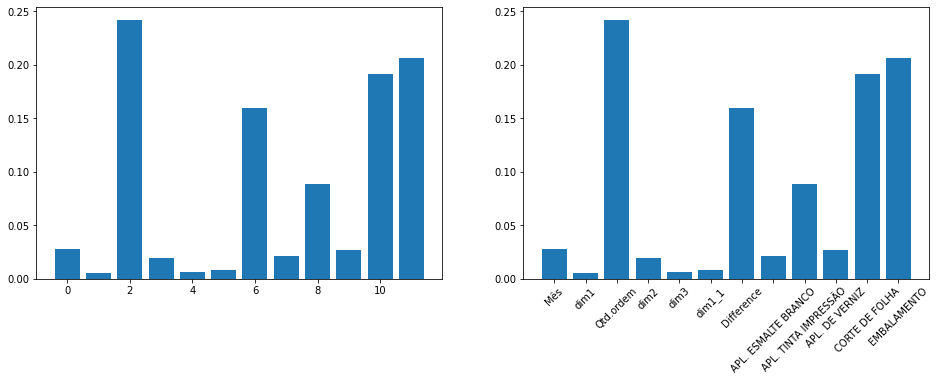

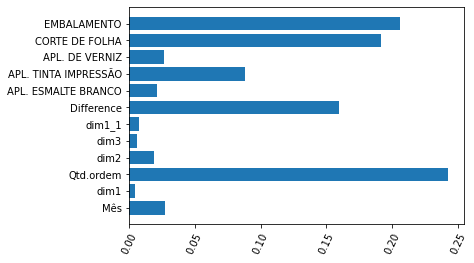

In [35]:
# decision tree for feature importance on a classification problem
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# define the model
model_name = "CART"
model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, class_weight=class_weight,
                                min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

model=dt_random.best_estimator_

# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
indices = np.argsort(importance)[-10:]
ind = [] ; res = [] ; max_v = 0
# summarize feature importance
for c,v in zip(X_enc.columns, importance):
    if abs(v) > 10**(-3):
        ind.append(c) ; res.append(v)
        if v > max_v: max_v = v ; imax = c
        print('%0s,%.5f' % (c,v* 100))
# plot feature importance
fig, (axs1 , axs2) = plt.subplots(1, 2, figsize=(16,5))
axs1.bar([x for x in range(len(importance))], importance)
axs2.bar(ind, res)
plt.xticks(rotation=45)

# plot feature importance
fig1 = plt.figure()
fig1 = plt.barh(ind, res)
# axs2.bar(ind, res)
plt.xticks(rotation=65)

print("\nMax score:", max_v*100, "(Feature:", imax, ")")

# save the figure
filename = str('plot-'+ model_name + '- ' + w_bins.value + '.png')
plt.savefig(filename)
print("\nFilename: ", filename)

plt.show()

### Prediction

Source: https://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix/ ; https://rasbt.github.io/mlxtend/

In [26]:
# make a prediction
y_pred = model.predict(X_test)
# y_pred = best_random.predict(X_test)
# y_pred = best_grid.predict(X_test)

print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))
print("\n", metrics.classification_report(y_test, y_pred))

# Creating the confusion matrix (binary classification)
cm = metrics.confusion_matrix(y_test, y_pred)
# Assigning columns names
cm_df = pd.DataFrame(cm, columns = ['Predicted Negative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive'])

display(cm_df)

Accuracy score: 0.697111631537861

               precision    recall  f1-score   support

           0       0.73      0.70      0.72      1392
           1       0.66      0.69      0.68      1170

    accuracy                           0.70      2562
   macro avg       0.70      0.70      0.70      2562
weighted avg       0.70      0.70      0.70      2562



,Predicted Negative,Predicted Positive
Actual Negative,974,418
Actual Positive,358,812


In [27]:
y_pred = model.predict(X_test)

def reg_metrics(y_test, y_pred, X_train):
    from sklearn.metrics import mean_squared_error, r2_score 

    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)

    # Scikit-learn doesn't have adjusted r-square, hence custom code
    n = y_pred.shape[0]
    k = X_train.shape[1]
    adj_r_sq = 1 - (1 - r2)*(n-1)/(n-1-k)

    print("RMSE: ", rmse, "\nR2: ", r2, "\nAdj_r_sq: ", adj_r_sq)


reg_metrics(y_test, y_pred, X_train)

model.score(X_train,y_train)

RMSE:  0.5503529489901358 
R2:  -0.2207191276156797 
Adj_r_sq:  -0.22646594186887237


0.9198789889723822

Index(['Mês', 'dim1', 'Qtd.ordem', 'dim2', 'dim3', 'dim1_1', 'Difference',
       'APL. ESMALTE BRANCO', 'APL. TINTA IMPRESSÃO', 'APL. DE VERNIZ',
       'CORTE DE FOLHA', 'EMBALAMENTO'],
      dtype='object')


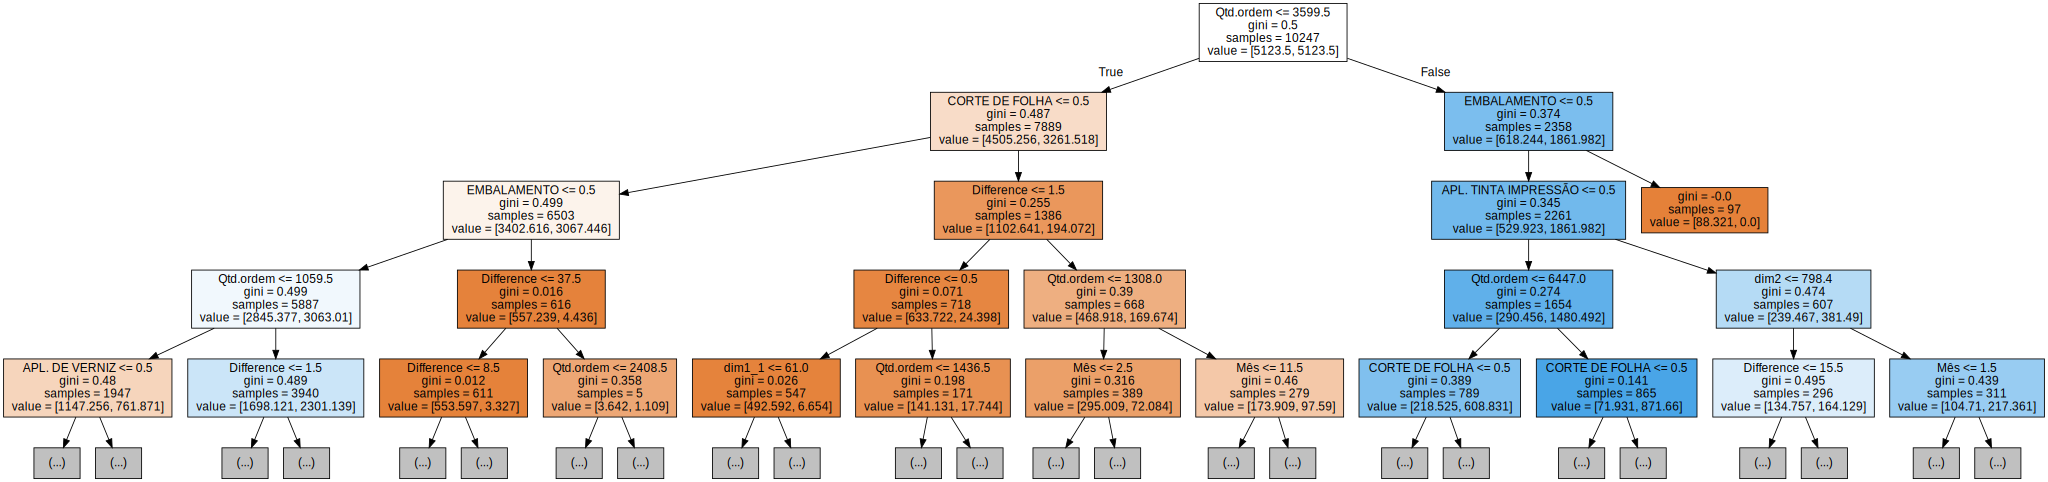

In [28]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

print(X_train.columns)

graph = Source(tree.export_graphviz(model, out_file=None
   , feature_names=X_train.columns, filled = True, max_depth=4), format='png')

img = SVG(graph.pipe(format='svg'))

display(graph)

In [29]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

### Random Search Cross Validation

In [30]:
# Number of features to consider at every split
max_features = [None, 'auto']
# Criterion
criterion = ['gini', 'entropy']
# Weight
class_weight = [None, 'balanced']
# Maximum number of levels in tree
max_depth = [3, 4, 6, 8, 10, 15, None]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]

# Create the random grid
random_grid = {'criterion': criterion,
              'max_features': max_features,
              'max_depth': max_depth,
              'class_weight': class_weight,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'criterion': ['gini', 'entropy'], 'max_features': [None, 'auto'], 'max_depth': [3, 4, 6, 8, 10, 15, None], 'class_weight': [None, 'balanced'], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4]}


In [31]:
from sklearn.model_selection import RandomizedSearchCV

# Use the random grid to search for best hyperparameters
# First create the base model to tune
dt = DecisionTreeClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
dt_random = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, n_iter = 100,
                               cv = dt_cv.value, verbose=2, random_state=42, n_jobs = -1, scoring=scoring.value)
# Fit the random search model
dt_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 6, 8, 10, 15, None],
                                        'max_features': [None, 'auto'],
                                        'min_samples_leaf': [2, 4],
                                        'min_samples_split': [5, 10]},
                   random_state=42, scoring='balanced_accuracy', verbose=2)

In [32]:
dt_random.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 8,
 'criterion': 'entropy',
 'class_weight': 'balanced'}

In [34]:
# Importing the metrics package from sklearn library
from sklearn import metrics

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Model Performance')
    print('Scoring:', scoring.value)
    print('K-Folds (CV):', dt_cv.value)
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print("\n", metrics.classification_report(y_test, y_pred))

    return accuracy

base_model = model
base_accuracy = evaluate(base_model, X_test, y_test)

print("-"*60)

best_random = dt_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

print("Selected features: ", selected_data)
print("Feature importance: ", best_random.feature_importances_)

Model Performance
Scoring: balanced_accuracy
K-Folds (CV): 5
Accuracy = 0.70%.

               precision    recall  f1-score   support

           0       0.73      0.70      0.72      1392
           1       0.66      0.69      0.68      1170

    accuracy                           0.70      2562
   macro avg       0.70      0.70      0.70      2562
weighted avg       0.70      0.70      0.70      2562

------------------------------------------------------------
Model Performance
Scoring: balanced_accuracy
K-Folds (CV): 5
Accuracy = 0.72%.

               precision    recall  f1-score   support

           0       0.79      0.65      0.71      1392
           1       0.66      0.79      0.72      1170

    accuracy                           0.72      2562
   macro avg       0.72      0.72      0.72      2562
weighted avg       0.73      0.72      0.72      2562

Improvement of 2.86%.
Selected features:  ['Mês', 'dim1', 'Qtd.ordem', 'Tipo de operação', 'dim2', 'dim3', 'dim1_1', 'Diffe

### Grid Search with Cross Validation

In [129]:
from sklearn.model_selection import GridSearchCV

# Number of features to consider at every split
max_features = [None, 'auto']
# Criterion
criterion = ['gini', 'entropy']
# Weight
class_weight = [None, 'balanced']
# Maximum number of levels in tree
max_depth = [3, 4, 6, 8, 10, 15, None]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]

# Create the parameter grid based on the results of random search
param_grid = {'criterion': criterion,
              'max_features': max_features,
              'max_depth': max_depth,
              'class_weight': class_weight,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

# Create a based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid,
                          cv = dt_cv.value, n_jobs = -1, verbose = 2, scoring=scoring.value)

In [130]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

base_model = model
base_accuracy = evaluate(base_model, X_test, y_test)

print("-"*60)

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Fitting 5 folds for each of 224 candidates, totalling 1120 fits
Model Performance
Scoring: balanced_accuracy
K-Folds (CV): 5
Accuracy = 0.71%.

               precision    recall  f1-score   support

           0       0.81      0.62      0.70      1434
           1       0.63      0.82      0.71      1128

    accuracy                           0.71      2562
   macro avg       0.72      0.72      0.71      2562
weighted avg       0.73      0.71      0.71      2562

------------------------------------------------------------
Model Performance
Scoring: balanced_accuracy
K-Folds (CV): 5
Accuracy = 0.71%.

               precision    recall  f1-score   support

           0       0.81      0.62      0.70      1434
           1       0.63      0.82      0.71      1128

    accuracy                           0.71      2562
   macro avg       0.72      0.72      0.71      2562
weighted avg       0.73      0.71      0.71      2562

Improvement of 0.00%.


### Results for top 10 models

In [131]:
df_results = pd.DataFrame(grid_search.cv_results_)

df_results = df_results[['params', 'rank_test_score']]
df_results = df_results[df_results['rank_test_score'] <= 10]
display(df_results)

for par in df_results['params']:
  print("Parameters:", par)
  grid_dt = DecisionTreeClassifier(criterion=par['criterion'], max_depth=par['max_depth'], max_features=par['max_features'],
                                      min_samples_leaf=par['min_samples_leaf'], min_samples_split=par['min_samples_split'], class_weight=par['class_weight'])
  grid_dt.fit(X_train, y_train)

  # make a prediction
  y_pred = grid_dt.predict(X_test)

  # print("Model:", model)
  print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))
  print("\n", metrics.classification_report(y_test, y_pred))

  # Creating the confusion matrix (binary classification)
  cm = metrics.confusion_matrix(y_test, y_pred)
  # Assigning columns names
  cm_df = pd.DataFrame(cm, columns = ['Predicted Negative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive'])

  display(cm_df)
  print("\n\n")

,params,rank_test_score
26,"{'class_weight': None, 'criterion': 'gini', 'm...",5
27,"{'class_weight': None, 'criterion': 'gini', 'm...",8
82,"{'class_weight': None, 'criterion': 'entropy',...",10
83,"{'class_weight': None, 'criterion': 'entropy',...",7
137,"{'class_weight': 'balanced', 'criterion': 'gin...",4
138,"{'class_weight': 'balanced', 'criterion': 'gin...",2
139,"{'class_weight': 'balanced', 'criterion': 'gin...",1
194,"{'class_weight': 'balanced', 'criterion': 'ent...",9
195,"{'class_weight': 'balanced', 'criterion': 'ent...",3
206,"{'class_weight': 'balanced', 'criterion': 'ent...",6


Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5}
Accuracy score: 0.704527712724434

               precision    recall  f1-score   support

           0       0.79      0.64      0.71      1434
           1       0.63      0.79      0.70      1128

    accuracy                           0.70      2562
   macro avg       0.71      0.71      0.70      2562
weighted avg       0.72      0.70      0.70      2562



,Predicted Negative,Predicted Positive
Actual Negative,916,518
Actual Positive,239,889





Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy score: 0.704527712724434

               precision    recall  f1-score   support

           0       0.79      0.64      0.71      1434
           1       0.63      0.79      0.70      1128

    accuracy                           0.70      2562
   macro avg       0.71      0.71      0.70      2562
weighted avg       0.72      0.70      0.70      2562



,Predicted Negative,Predicted Positive
Actual Negative,915,519
Actual Positive,238,890





Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5}
Accuracy score: 0.7123341139734582

               precision    recall  f1-score   support

           0       0.80      0.64      0.71      1434
           1       0.64      0.80      0.71      1128

    accuracy                           0.71      2562
   macro avg       0.72      0.72      0.71      2562
weighted avg       0.73      0.71      0.71      2562



,Predicted Negative,Predicted Positive
Actual Negative,924,510
Actual Positive,227,901





Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy score: 0.7127244340359095

               precision    recall  f1-score   support

           0       0.80      0.64      0.72      1434
           1       0.64      0.80      0.71      1128

    accuracy                           0.71      2562
   macro avg       0.72      0.72      0.71      2562
weighted avg       0.73      0.71      0.71      2562



,Predicted Negative,Predicted Positive
Actual Negative,924,510
Actual Positive,226,902





Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy score: 0.7068696330991413

               precision    recall  f1-score   support

           0       0.81      0.62      0.70      1434
           1       0.63      0.82      0.71      1128

    accuracy                           0.71      2562
   macro avg       0.72      0.72      0.71      2562
weighted avg       0.73      0.71      0.71      2562



,Predicted Negative,Predicted Positive
Actual Negative,887,547
Actual Positive,204,924





Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5}
Accuracy score: 0.7088212334113974

               precision    recall  f1-score   support

           0       0.82      0.62      0.70      1434
           1       0.63      0.82      0.71      1128

    accuracy                           0.71      2562
   macro avg       0.72      0.72      0.71      2562
weighted avg       0.73      0.71      0.71      2562



,Predicted Negative,Predicted Positive
Actual Negative,889,545
Actual Positive,201,927





Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy score: 0.7080405932864949

               precision    recall  f1-score   support

           0       0.81      0.62      0.70      1434
           1       0.63      0.82      0.71      1128

    accuracy                           0.71      2562
   macro avg       0.72      0.72      0.71      2562
weighted avg       0.73      0.71      0.71      2562



,Predicted Negative,Predicted Positive
Actual Negative,890,544
Actual Positive,204,924





Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5}
Accuracy score: 0.7111631537861046

               precision    recall  f1-score   support

           0       0.81      0.64      0.71      1434
           1       0.64      0.81      0.71      1128

    accuracy                           0.71      2562
   macro avg       0.72      0.72      0.71      2562
weighted avg       0.73      0.71      0.71      2562



,Predicted Negative,Predicted Positive
Actual Negative,912,522
Actual Positive,218,910





Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy score: 0.7111631537861046

               precision    recall  f1-score   support

           0       0.81      0.64      0.71      1434
           1       0.64      0.81      0.71      1128

    accuracy                           0.71      2562
   macro avg       0.72      0.72      0.71      2562
weighted avg       0.73      0.71      0.71      2562



,Predicted Negative,Predicted Positive
Actual Negative,912,522
Actual Positive,218,910





Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5}
Accuracy score: 0.7064793130366901

               precision    recall  f1-score   support

           0       0.78      0.67      0.72      1434
           1       0.64      0.75      0.69      1128

    accuracy                           0.71      2562
   macro avg       0.71      0.71      0.71      2562
weighted avg       0.72      0.71      0.71      2562



,Predicted Negative,Predicted Positive
Actual Negative,960,474
Actual Positive,278,850



### Print results and specifications

Write results in file: *results.txt*

In [132]:
for writing_model in [base_model, best_grid, best_random]:

  # make a prediction
  y_pred = writing_model.predict(X_test)

  accuracy_score = metrics.accuracy_score(y_test, y_pred)
  evaluation = metrics.classification_report(y_test, y_pred)

  # # Creating the confusion matrix (binary classification)
  # cm = metrics.confusion_matrix(y_test, y_pred)
  # # Assigning columns names
  # cm_df = pd.DataFrame(cm, columns = ['Predicted Negative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive'])

  # Creating the confusion matrix (multi-class classification)
  from mlxtend.evaluate import confusion_matrix
  cml2 = confusion_matrix(y_target=y_test, y_predicted=y_pred, binary=True, positive_label=0)

  # Assigning columns names
  cml2_df = pd.DataFrame(cml2, columns = ['Predicted Positive', 'Predicted Negative'], index = ['Actual Positive', 'Actual Negative'])

  with open('results.txt', 'a') as f:
      f.write('-'*50)
      f.write("\n\nModel: %s" % writing_model)
      f.write("\n\nRandom: %s; Test size: %d" % (shuffle, test_size))
      f.write("\nMax score: %d ; (Feature: %s)" % (max_v*100,imax))

      f.write("\n\nAccuracy score: %d" % accuracy_score)
      f.write("\nScoring criteria optimized: %s" % scoring.value)
      f.write("\nK-Folds (CV): %s" % dt_cv.value)
      f.write("\n%s" % str(evaluation))
      f.write("\n\nConfusion matrix ")
      # save confusion matrix and slice into four pieces
      # TP = cm[1][1]; TN = cm[0][0] ; FP = cm[0][1] ; FN = cm[1][0]
      TP = cml2[0][0] ; TN = cml2[1][1] ; FP = cml2[1][0] ; FN = cml2[0][1]

      f.write('\nTrue Positives: %d' % TP)
      f.write('\nTrue Negatives: %d' % TN)
      f.write('\nFalse Positives: %d' % FP)
      f.write('\nFalse Negatives: %d\n\n' % FN)

  display(Markdown('#### Results'))

  print("Model:", writing_model)
  print("Shuffle:", shuffle, "; Test size:", test_size)
  print("Max score:", max_v*100, "(Feature:", imax, ")")

  print("\nAccuracy score:", accuracy_score)
  print('Scoring criteria optimized: ', scoring.value)
  print('K-Folds (CV):', dt_cv.value)
  print("\n", evaluation)

#### Results

Model: DecisionTreeClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=4,
                       min_samples_split=10)
Shuffle: True ; Test size: 0.19999999999999996
Max score: 33.61259874717438 (Feature: Qtd.ordem )

Accuracy score: 0.7080405932864949
Scoring criteria optimized:  balanced_accuracy
K-Folds (CV): 5

               precision    recall  f1-score   support

           0       0.81      0.62      0.70      1434
           1       0.63      0.82      0.71      1128

    accuracy                           0.71      2562
   macro avg       0.72      0.72      0.71      2562
weighted avg       0.73      0.71      0.71      2562



#### Results

Model: DecisionTreeClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=4,
                       min_samples_split=10)
Shuffle: True ; Test size: 0.19999999999999996
Max score: 33.61259874717438 (Feature: Qtd.ordem )

Accuracy score: 0.7080405932864949
Scoring criteria optimized:  balanced_accuracy
K-Folds (CV): 5

               precision    recall  f1-score   support

           0       0.81      0.62      0.70      1434
           1       0.63      0.82      0.71      1128

    accuracy                           0.71      2562
   macro avg       0.72      0.72      0.71      2562
weighted avg       0.73      0.71      0.71      2562



#### Results

Model: DecisionTreeClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=4,
                       min_samples_split=10)
Shuffle: True ; Test size: 0.19999999999999996
Max score: 33.61259874717438 (Feature: Qtd.ordem )

Accuracy score: 0.7080405932864949
Scoring criteria optimized:  balanced_accuracy
K-Folds (CV): 5

               precision    recall  f1-score   support

           0       0.81      0.62      0.70      1434
           1       0.63      0.82      0.71      1128

    accuracy                           0.71      2562
   macro avg       0.72      0.72      0.71      2562
weighted avg       0.73      0.71      0.71      2562



### Binary Classification

In [ ]:
# Importing the metrics package from sklearn library
from sklearn import metrics

# Creating the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

# Assigning columns names
cm_df = pd.DataFrame(cm, columns = ['Predicted Negative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive'])

# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,2277,1369
Actual Positive,884,2037


In [ ]:
# save confusion matrix and slice into four pieces
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

# calculate mis-classification
conf_misclassification = 1- conf_accuracy

# calculate the sensitivity (recall)
conf_sensitivity = (TP / float(TP + FN))

# calculate the specificity
conf_specificity = (TN / float(TN + FP))

# calculate precision
conf_precision = (TP / float(TP + FP))

# calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) /
(conf_precision + conf_sensitivity))

print('-'*25)
print(f'Accuracy: {round(conf_accuracy,2)}')
print(f'Mis-Classification: {round(conf_misclassification,2)}')
print(f'Sensitivity: {round(conf_sensitivity,2)}')
print(f'Specificity: {round(conf_specificity,2)}')
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')

True Positives: 2037
True Negatives: 2277
False Positives: 1369
False Negatives: 884
-------------------------
Accuracy: 0.66
Mis-Classification: 0.34
Sensitivity: 0.7
Specificity: 0.62
Precision: 0.6
f_1 Score: 0.64


### Multi-class Classification

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

cml = metrics.confusion_matrix(y_test, y_pred, labels=labels_3)

# Assigning columns names
cml_df = pd.DataFrame(cml)

# Showing the confusion matrix
# cm_df
display(cml_df)

,0,1,2
0,1977,720,895
1,313,734,545
2,313,403,667


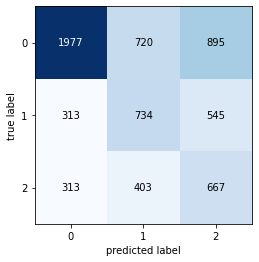

In [ ]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cml)

# save the figure
plt.savefig(str('plot-'+ model_name + '-cm-1- ' + w_bins.value + '.png'))

plt.show()

In [ ]:
from mlxtend.evaluate import confusion_matrix
cml2 = confusion_matrix(y_target=y_test,
                      y_predicted=y_pred,
                      binary=True,
                      positive_label=0)

# Assigning columns names
cml2_df = pd.DataFrame(cml2, columns = ['Predicted Positive', 'Predicted Negative'], index = ['Actual Positive', 'Actual Negative'])

# Showing the confusion matrix
cml2_df

# fig, ax = plot_confusion_matrix(conf_mat=cml2)

# # save the figure
# plt.savefig(str('plot-CART-cm-2-' + 'bins-6s' + '.png'))

# plt.show()

,Predicted Positive,Predicted Negative
Actual Positive,2349,626
Actual Negative,1615,1977


In [ ]:
# save confusion matrix and slice into four pieces
TP = cml2[0][0]
TN = cml2[1][1]
FP = cml2[1][0]
FN = cml2[0][1]

print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

# calculate mis-classification
conf_misclassification = 1- conf_accuracy

# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))

# calculate the specificity
conf_specificity = (TN / float(TN + FP))

# calculate precision
conf_precision = (TP / float(TP + FP))

# calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) /
(conf_precision + conf_sensitivity))

print('-'*25)
print(f'Accuracy: {round(conf_accuracy,2)}')
print(f'Mis-Classification: {round(conf_misclassification,2)}')
print(f'Sensitivity: {round(conf_sensitivity,2)}')
print(f'Specificity: {round(conf_specificity,2)}')
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')

True Positives: 503
True Negatives: 289
False Positives: 353
False Negatives: 280
-------------------------
Accuracy: 0.56
Mis-Classification: 0.44
Sensitivity: 0.64
Specificity: 0.45
Precision: 0.59
f_1 Score: 0.61


### Feature Importance

In [ ]:
# Fazer Feature Importance para modelos com melhores resultados

## Feature Selection

In [ ]:
# load dataset
data = df

# feature matrix
feature_selected = ind
X_train_fsel = X_train[feature_selected]
X_test_fsel = X_test[feature_selected]

print("\nFeature Selection --> X_train (shape):", X_train_fsel.shape, "; X_train (shape):", X_test_fsel.shape)
display(X_train_fsel.head())


Feature Selection --> X_train (shape): (10887, 10) ; X_train (shape): (1922, 10)


,Mês,dim1,dim2,dim3,dim1_1,Difference,Tipo de operação_APLICAÇÃO DE ESMALTE BRANCO,Tipo de operação_APLICAÇÃO DE VERNIZ,Tipo de operação_CORTE DE FOLHA,Tipo de operação_EMBALAMENTO
6858,4.0,833.0,797.0,0.18,52.0,4.0,0,0,0,0
26249,12.0,833.0,756.8,0.18,65.0,0.0,0,1,0,0
21375,10.0,833.0,716.6,0.18,52.0,1.0,0,1,0,0
17729,9.0,931.0,777.5,0.17,49.0,3.0,0,0,0,1
5725,3.0,833.0,798.2,0.18,65.0,0.0,0,1,0,0


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, min_samples_leaf=2, min_samples_split=10)
Feature: Mês, Score: 3.53584
Feature: dim1, Score: 2.57513
Feature: dim2, Score: 4.96615
Feature: dim3, Score: 1.62263
Feature: dim1_1, Score: 0.71080
Feature: Difference, Score: 18.86512
Feature: Tipo de operação_APLICAÇÃO DE ESMALTE BRANCO, Score: 10.63341
Feature: Tipo de operação_APLICAÇÃO DE VERNIZ, Score: 10.41789
Feature: Tipo de operação_CORTE DE FOLHA, Score: 22.40875
Feature: Tipo de operação_EMBALAMENTO, Score: 24.26429

Max score: 24.26429254846065 (Feature: Tipo de operação_EMBALAMENTO )

Filename:  plot-FSelect-CART- 2 levels.png


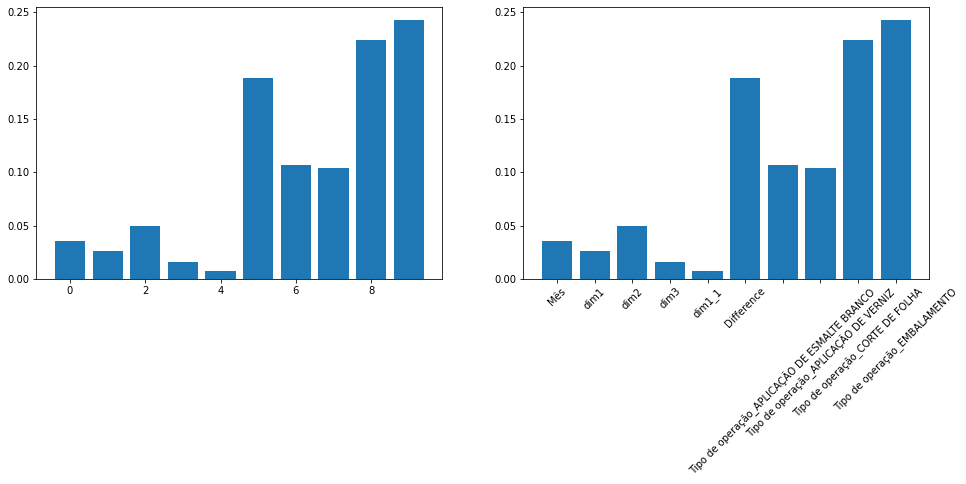

In [ ]:
# decision tree for feature importance on a regression problem
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

# define the model
model_name = "CART"
model_fsel = grid_search.best_estimator_
# print(grid_search.best_params_, "\n")
# base_model = model
# model_fsel = base_model
print(model_fsel)

# fit the model
model_fsel.fit(X_train_fsel, y_train)
# get importance
importance = model_fsel.feature_importances_
indices = np.argsort(importance)[-10:]
ind = [] ; res = [] ; max_v = 0
# summarize feature importance
for c,v in zip(X_train_fsel.columns, importance):
    ind.append(c) ; res.append(v)
    if v > max_v: max_v = v ; imax = c
    print('Feature: %0s, Score: %.5f' % (c,v*100))
# plot feature importance
fig, (axs1 , axs2) = plt.subplots(1, 2, figsize=(16,5))
axs1.bar([x for x in range(len(importance))], importance)
axs2.bar(ind, res)
plt.xticks(rotation=45)

print("\nMax score:", max_v*100, "(Feature:", imax, ")")

# save the figure
filename = str('plot-FSelect-'+ model_name + '- ' + w_bins.value + '.png')
plt.savefig(filename)
print("\nFilename: ", filename)

plt.show()

In [ ]:
# make a prediction
y_pred = model_fsel.predict(X_test_fsel)

print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))
print("\n", metrics.classification_report(y_test, y_pred))

Accuracy score: 0.6940686784599376

               precision    recall  f1-score   support

           0       0.76      0.65      0.70      1055
           1       0.64      0.75      0.69       867

    accuracy                           0.69      1922
   macro avg       0.70      0.70      0.69      1922
weighted avg       0.70      0.69      0.69      1922



### Display Tree

[Visualization of decision trees](https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084)

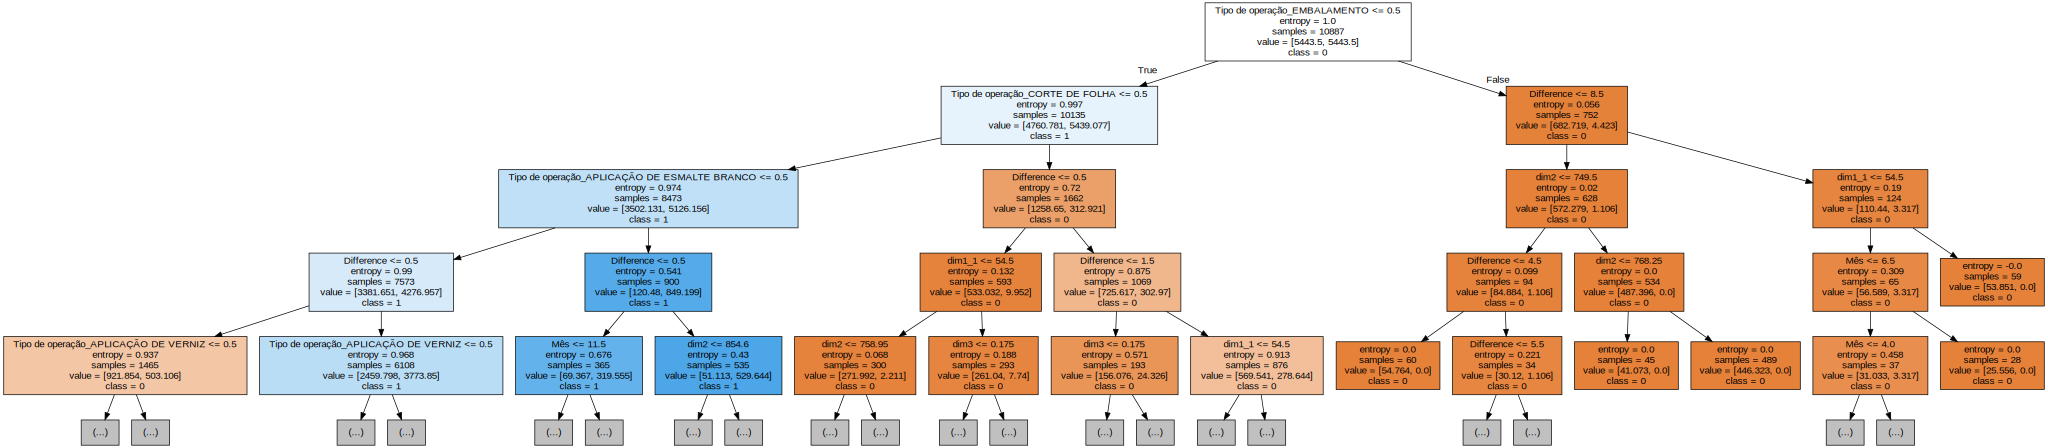

In [ ]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

labels = X_train_fsel.columns

graph = Source(tree.export_graphviz(model_fsel, out_file=None
   , feature_names=labels, filled = True, class_names=['0', '1'], max_depth=4))

display(SVG(graph.pipe(format='svg')))
